## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

DataFrames vs RDD:
# https://databricks.com/glossary/tungsten
DataFrame Advantages over RDD
1.  Custom Memory management Project Tungsten Data is stored in off-heap memory in binary format. 
    This saves a lot of memory space.
    Also there is no Garbage Collection overhead involved. 
    By knowing the schema of data in advance and storing efficiently in binary format, 
    expensive java Serialization is also avoided.


2. Optimized Execution Plans (aka Catalyst Optimizer)
    # https://databricks.com/glossary/catalyst-optimizer
    Query plans are created for execution using Spark catalyst optimiser. 
    After an optimised execution plan is prepared going through some steps, 
    the final execution happens internally on RDDs only 
    but thats completely hidden from the users.

3. ever use RDD's unless you want to handle the low-level optimizations/serializations yourself.

In [0]:
print('Apache Spark Version :'+spark.version)


Apache Spark Version :3.1.2


In [0]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.8.10 (default, Mar 15 2022, 12:22:08) 
[GCC 9.4.0]
Version info.
sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0)


In [0]:
# Defining schema for the data loaded to be in RDD and Dataframe
from pyspark.sql.types import StructType,StructField, StringType, IntegerType 
 
schema = StructType() \
      .add("Id",StringType(),True) \
      .add("Sponsor",StringType(),True) \
      .add("Status",StringType(),True) \
      .add("Start",StringType(),True) \
      .add("Completion",StringType(),True) \
      .add("Type",StringType(),True) \
      .add("Submission",StringType(),True) \
      .add("Conditions",StringType(),True) 
print(schema)


StructType(List(StructField(Id,StringType,true),StructField(Sponsor,StringType,true),StructField(Status,StringType,true),StructField(Start,StringType,true),StructField(Completion,StringType,true),StructField(Type,StringType,true),StructField(Submission,StringType,true),StructField(Conditions,StringType,true)))


In [0]:
# PRE PROCESSING 
# DEFINING GLOBAL VARIBALES AND CONFIG
#files_2019 = ["/FileStore/tables/clinicaltrial_2019_csv.gz"]
#files_2020 = ["/FileStore/tables/clinicaltrial_2020_csv.gz"]
#files_2021 = ["/FileStore/tables/clinicaltrial_2021_csv.gz"]

file_type = "csv"
infer_schema = "true"
first_row_is_header = "True"
delimiter = "|"



In [0]:
# Multiple ways to Read  Data files from dbfs file system
# /FileStore/tables/clinicaltrial_2019.csv
# df_2019 = spark.read.format(file_type) \
 # .option("inferSchema", infer_schema) \
 # .option("header", first_row_is_header) \
 # .option("sep", delimiter) \
 # .load(files_2019)

files_2019 = ["/FileStore/tables/clinicaltrial_2019_csv.gz"]
files_2020 = ["/FileStore/tables/clinicaltrial_2020_csv.gz"]
files_2021 = ["/FileStore/tables/clinicaltrial_2021_csv.gz"]

# /FileStore/tables/clinicaltrial_2019.csv
df_2019 = spark.read.options(header='True', inferSchema='True', delimiter='|').csv(files_2019)

# /FileStore/tables/clinicaltrial_2020.csv
df_2020 = spark.read.options(header='True', inferSchema='True', delimiter='|').csv(files_2020)

# Reading csv file from gz file  /FileStore/tables/clinicaltrial_2021.csv.gz
df_2021 = spark.read.options(header='True', inferSchema='True', delimiter='|').csv(files_2021)


# Reading csv throuhg com.databricks.spark.csv
# df = spark.read.format('com.databricks.spark.csv').\
#                               options(header='true', \
#                               inferschema='true').\
#                load("/FileStore/tables/clinicaltrial_2019.csv",header=True)




In [0]:
# Data and Schema validation
print("Year 2019")
df_2019.show(5)
print("Year 2020")
df_2020.show(5)
print("Year 2021")
df_2021.show(5)
df.printSchema()

df_2019.printSchema()
df_2020.printSchema()
df_2021.printSchema()
df.printSchema()


Year 2019
+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+-------------+
|         Id|             Sponsor|              Status|   Start|Completion|                Type|Submission|          Conditions|Interventions|
+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+-------------+
|NCT02758028|The University of...|          Recruiting|Aug 2005|  Nov 2021|      Interventional|  Apr 2016|                null|         null|
|NCT02751957|     Duke University|           Completed|Jul 2016|  Jul 2020|      Interventional|  Apr 2016|Autistic Disorder...|         null|
|NCT02758483|Universidade Fede...|           Completed|Mar 2017|  Jan 2018|      Interventional|  Apr 2016|   Diabetes Mellitus|         null|
|NCT02759848|Istanbul Medeniye...|           Completed|Jan 2012|  Dec 2014|       Observational|  May 2016|Tuberculosis,Lung...|    

In [0]:
# QUESTION -1 The number of studies in the dataset
# PRE PROCESSING 
# DEFINING GLOBAL VARIBALES AND CONFIG
file_type = "csv"
infer_schema = "true"
first_row_is_header = "True"
delimiter = "|"

files_2019 = ["/FileStore/tables/clinicaltrial_2019_csv.gz"]
df_2019 = spark.read.options(header='True', inferSchema='True', delimiter='|').csv(files_2019)

files_2020 = ["/FileStore/tables/clinicaltrial_2020_csv.gz"]
df_2020 = spark.read.options(header='True', inferSchema='True', delimiter='|').csv(files_2020)

files_2021 = ["/FileStore/tables/clinicaltrial_2021_csv.gz"]
df_2021 = spark.read.options(header='True', inferSchema='True', delimiter='|').csv(files_2021)


In [0]:
count_in_2019 = df_2019.select("Id").count()
count_in_2020 = df_2020.select("Id").count()
count_in_2021 = df_2021.select("Id").count()

print("count is ", count_in_2019)
print("count is ", count_in_2020)
print("count is ", count_in_2021)

df_count = spark.createDataFrame([(2019, count_in_2019),(2020, count_in_2020),(2021, count_in_2021),],["Year", "count"])
df_count.show()

count is  326348
count is  356466
count is  387261
+----+------+
|Year| count|
+----+------+
|2019|326348|
|2020|356466|
|2021|387261|
+----+------+



In [0]:
# QUESTION -2 
# list all the types (as contained in the Type column) of studies in the dataset along with
# the frequencies of each type. These should be ordered from most frequent to least frequent
print("2019 types of Studies along with Frequncies")
typewise_2019 = df_2019.groupBy('Type').count().sort('Type', ascending=True).show()

print("2020 types of Studies along with Frequncies")
typewise_2020 = df_2020.groupBy('Type').count().sort('Type', ascending=True).show()

print("2021 types of Studies along with Frequncies")
typewise_2021 = df_2021.groupBy('Type').count().sort('Type', ascending=True).show()

2019 types of Studies along with Frequncies
+--------------------+------+
|                Type| count|
+--------------------+------+
|     Expanded Access|    69|
|      Interventional|255945|
|       Observational| 64163|
|Observational [Pa...|  6171|
+--------------------+------+

2020 types of Studies along with Frequncies
+--------------------+------+
|                Type| count|
+--------------------+------+
|     Expanded Access|    69|
|      Interventional|277631|
|       Observational| 71434|
|Observational [Pa...|  7332|
+--------------------+------+

2021 types of Studies along with Frequncies
+--------------------+------+
|                Type| count|
+--------------------+------+
|     Expanded Access|    69|
|      Interventional|301472|
|       Observational| 77540|
|Observational [Pa...|  8180|
+--------------------+------+



In [0]:
# QUESTION -3 
from pyspark.sql.functions import split
from pyspark.sql.functions import col
import pyspark.sql.functions as F

df_2021 = spark.read.options(header='True', inferSchema='True', delimiter='|') .csv(files_2021)
df_2021_with_cond = df_2021.withColumn("Conditions",split(col("Conditions"), "\\,"))
df = df_2021_with_cond.withColumn('Conditions',F.explode("Conditions")).groupBy('Conditions').count().orderBy(F.desc("count"))
df.show(5)



+-----------------+-----+
|       Conditions|count|
+-----------------+-----+
|        Carcinoma|13389|
|Diabetes Mellitus|11080|
|        Neoplasms| 9371|
| Breast Neoplasms| 8640|
|         Syndrome| 8032|
+-----------------+-----+
only showing top 5 rows



In [0]:
#QUESTION - 4
file_name = "/FileStore/tables/mesh.csv"
delimiter = ","


meshdf = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_name)


meshdf.printSchema()
meshdf.select('tree').show(5)

root
 |-- term: string (nullable = true)
 |-- tree: string (nullable = true)

+-------------------+
|               tree|
+-------------------+
|D03.633.100.221.173|
|D03.633.100.221.173|
|D02.705.400.625.800|
|D02.705.539.345.800|
|D02.886.300.692.800|
+-------------------+
only showing top 5 rows



In [0]:
# YEAR - 2019
from pyspark.sql.functions import col,substring
from pyspark.sql.functions import split
from pyspark.sql.functions import col
import pyspark.sql.functions as F

df_2019 = spark.read.options(header='True', inferSchema='True', delimiter='|').csv(files_2019)
df_2019_cond_formatted = df_2019.withColumn("Conditions",split(col("Conditions"),"\\,"))
df_2019_conditions = df_2019_cond_formatted.withColumn("Conditions",F.explode("Conditions"))


meshdata_df = meshdf.select('term','tree',substring('tree',1,3).alias('root')).drop('tree')#.show(15)

#meshdata_df.show(4)
join_with_clinical =  df_2019_conditions.join(meshdata_df,(df_2019_conditions.Conditions==meshdata_df.term),'left')
join_with_clinical_with_mesh = join_with_clinical.select(meshdata_df.root,df_2019_conditions.Conditions)
#join_with_clinical.show(5)
root_wise_count_in_2019 = join_with_clinical_with_mesh.groupBy('root').count().sort('count', ascending=False).filter("root IS NOT null")
root_wise_count_in_2019.show(10)

+----+------+
|root| count|
+----+------+
| C04|123221|
| C23|113997|
| C14| 82043|
| C10| 76665|
| C01| 73477|
| C06| 73272|
| C08| 45180|
| C13| 36293|
| C18| 36051|
| C12| 34699|
+----+------+
only showing top 10 rows



In [0]:
# YEAR - 2020
from pyspark.sql.functions import col,substring
from pyspark.sql.functions import split
from pyspark.sql.functions import col
import pyspark.sql.functions as F

df_2020 = spark.read.options(header='True', inferSchema='True', delimiter='|').csv(files_2020)
df_2020_cond_formatted = df_2020.withColumn("Conditions",split(col("Conditions"),"\\,"))
df_2020_conditions = df_2020_cond_formatted.withColumn("Conditions",F.explode("Conditions"))

meshdata_df = meshdf.select('term','tree',substring('tree',1,3).alias('root')).drop('tree')#.show(15)

#meshdata_df.show(4)
join_with_clinical =  df_2020_conditions.join(meshdata_df,(df_2020_conditions.Conditions==meshdata_df.term),'left')
join_with_clinical_with_mesh = join_with_clinical.select(meshdata_df.root,df_2020_conditions.Conditions)
#join_with_clinical.show(5)
root_wise_count_in_2020 = join_with_clinical_with_mesh.groupBy('root').count().sort('count', ascending=False).filter("root IS NOT null")
root_wise_count_in_2020.show(10)


+----+------+
|root| count|
+----+------+
| C04|133091|
| C23|124589|
| C01| 94293|
| C14| 88065|
| C10| 83894|
| C06| 79382|
| C08| 61138|
| C13| 39316|
| C18| 38439|
| C12| 37294|
+----+------+
only showing top 10 rows



In [0]:
# YEAR - 2021
from pyspark.sql.functions import col,substring
from pyspark.sql.functions import split
from pyspark.sql.functions import col
import pyspark.sql.functions as F

df_2021 = spark.read.options(header='True', inferSchema='True', delimiter='|').csv(files_2021)
df_2021_cond_formatted = df_2021.withColumn("Conditions",split(col("Conditions"),"\\,"))
df_2021_conditions = df_2021_cond_formatted.withColumn("Conditions",F.explode("Conditions"))
meshdata_df = meshdf.select('term','tree',substring('tree',1,3).alias('root')).drop('tree')#.show(15)

#meshdata_df.show(4)
join_with_clinical =  df_2021_conditions.join(meshdata_df,(df_2021_conditions.Conditions==meshdata_df.term),'left')
join_with_clinical_with_mesh = join_with_clinical.select(meshdata_df.root,df_2021_conditions.Conditions)
#join_with_clinical.show(5)
root_wise_count_in_2021 = join_with_clinical_with_mesh.groupBy('root').count().sort('count', ascending=False).filter("root IS NOT null")
root_wise_count_in_2021.show(10)

+----+------+
|root| count|
+----+------+
| C04|143994|
| C23|136079|
| C01|106674|
| C14| 94523|
| C10| 92310|
| C06| 85646|
| C08| 70720|
| C13| 42599|
| C18| 41276|
| C12| 40161|
+----+------+
only showing top 10 rows



In [0]:

newdf_2019pandasDF = root_wise_count_in_2019.toPandas()
newdf_2020pandasDF = root_wise_count_in_2020.toPandas()
newdf_2021pandasDF = root_wise_count_in_2021.toPandas()
#print(pandasDF)

merged = newdf_2019pandasDF.merge(newdf_2020pandasDF, on='root').merge(newdf_2021pandasDF, on='root')
merged = merged.set_index('root')
newmerge = merged.rename(columns={'count_x': '2019', 'count_y': '2020','count':'2021'})
newmerge.head(10)





,2019,2020,2021
root,,,
C04,123221,133091,143994
C23,113997,124589,136079
C14,82043,88065,94523
C10,76665,83894,92310
C01,73477,94293,106674
C06,73272,79382,85646
C08,45180,61138,70720
C13,36293,39316,42599
C18,36051,38439,41276


In [0]:
# QUESTION - 5 
file_name = "/FileStore/tables/pharma.csv"
file_type = "csv"
infer_schema = "false"
first_row_is_header = "True"
delimiter = ","


df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_name)

df.printSchema()
#display(df)


root
 |-- Company: string (nullable = true)
 |-- Parent_Company: string (nullable = true)
 |-- Penalty_Amount: string (nullable = true)
 |-- Subtraction_From_Penalty: string (nullable = true)
 |-- Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting: string (nullable = true)
 |-- Penalty_Year: string (nullable = true)
 |-- Penalty_Date: string (nullable = true)
 |-- Offense_Group: string (nullable = true)
 |-- Primary_Offense: string (nullable = true)
 |-- Secondary_Offense: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Level_of_Government: string (nullable = true)
 |-- Action_Type: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- Civil/Criminal: string (nullable = true)
 |-- Prosecution_Agreement: string (nullable = true)
 |-- Court: string (nullable = true)
 |-- Case_ID: string (nullable = true)
 |-- Private_Litigation_Case_Title: string (nullable = true)
 |-- Lawsuit_Resolution: string (nullable = true)
 |-- Facility_State: string (

In [0]:
OrderSchema = df.schema 
display(OrderSchema)
df.show(1)

StructType(List(StructField(Company,StringType,true),StructField(Parent_Company,StringType,true),StructField(Penalty_Amount,StringType,true),StructField(Subtraction_From_Penalty,StringType,true),StructField(Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting,StringType,true),StructField(Penalty_Year,StringType,true),StructField(Penalty_Date,StringType,true),StructField(Offense_Group,StringType,true),StructField(Primary_Offense,StringType,true),StructField(Secondary_Offense,StringType,true),StructField(Description,StringType,true),StructField(Level_of_Government,StringType,true),StructField(Action_Type,StringType,true),StructField(Agency,StringType,true),StructField(Civil/Criminal,StringType,true),StructField(Prosecution_Agreement,StringType,true),StructField(Court,StringType,true),StructField(Case_ID,StringType,true),StructField(Private_Litigation_Case_Title,StringType,true),StructField(Lawsuit_Resolution,StringType,true),StructField(Facility_State,StringType,true),StructField(Ci

In [0]:
from pyspark.sql.functions import col, coalesce, lit

clinical_data_2019 = spark.read.options(header='True', inferSchema='True', delimiter='|') .csv(files_2019)

join_clinical_with_pharma = clinical_data_2019.join(df,clinical_data_2019.Sponsor==df.Parent_Company,"leftouter")
# newdf_2020.show(10)
sponsor_from_join = join_clinical_with_pharma.where(coalesce(col("Major_Industry_of_Parent") != 'pharmaceuticals', lit(True)))#.show()

sponsor_count_2019 = sponsor_from_join.groupBy('Sponsor').count() .orderBy('count', ascending=False)
sponsor_count_2019.show(10)


+--------------------+-----+
|             Sponsor|count|
+--------------------+-----+
|National Cancer I...| 3003|
|Merck Sharp & Doh...| 2124|
|M.D. Anderson Can...| 2097|
|         Mayo Clinic| 1930|
|Novartis Pharmace...| 1881|
|Assistance Publiq...| 1764|
|Massachusetts Gen...| 1715|
|   Hoffmann-La Roche| 1694|
|National Taiwan U...| 1608|
|Eli Lilly and Com...| 1500|
+--------------------+-----+
only showing top 10 rows



In [0]:
# question 5
from pyspark.sql.functions import col, coalesce, lit

clinical_data_2020 = spark.read.options(header='True', inferSchema='True', delimiter='|') .csv(files_2020)

join_clinical_with_pharma = clinical_data_2020.join(df,clinical_data_2020.Sponsor==df.Parent_Company,"leftouter")
# newdf_2020.show(10)
sponsor_from_join = join_clinical_with_pharma.where(coalesce(col("Major_Industry_of_Parent") != 'pharmaceuticals', lit(True)))#.show()

sponsor_count_2020 = sponsor_from_join.groupBy('Sponsor').count() .orderBy('count', ascending=False)
sponsor_count_2020.show(10)
 

+--------------------+-----+
|             Sponsor|count|
+--------------------+-----+
|National Cancer I...| 3100|
|M.D. Anderson Can...| 2238|
|Merck Sharp & Doh...| 2184|
|         Mayo Clinic| 2097|
|Assistance Publiq...| 2043|
|Novartis Pharmace...| 1962|
|Massachusetts Gen...| 1823|
|   Assiut University| 1806|
|   Hoffmann-La Roche| 1761|
|National Taiwan U...| 1720|
+--------------------+-----+
only showing top 10 rows



In [0]:
from pyspark.sql.functions import col, coalesce, lit

clinical_data_2021 = spark.read.options(header='True', inferSchema='True', delimiter='|') .csv(files_2021)

join_clinical_with_pharma = clinical_data_2021.join(df,clinical_data_2021.Sponsor==df.Parent_Company,"leftouter")
# newdf_2020.show(10)
sponsor_from_join = join_clinical_with_pharma.where(coalesce(col("Major_Industry_of_Parent") != 'pharmaceuticals', lit(True)))#.show()

sponsor_count_2021 = sponsor_from_join.groupBy('Sponsor').count() .orderBy('count', ascending=False)
sponsor_count_2021.show(10)

+--------------------+-----+
|             Sponsor|count|
+--------------------+-----+
|National Cancer I...| 3218|
|M.D. Anderson Can...| 2414|
|Assistance Publiq...| 2369|
|         Mayo Clinic| 2300|
|Merck Sharp & Doh...| 2243|
|   Assiut University| 2154|
|Novartis Pharmace...| 2088|
|Massachusetts Gen...| 1971|
|    Cairo University| 1928|
|   Hoffmann-La Roche| 1828|
+--------------------+-----+
only showing top 10 rows



In [0]:
df1 = sponsor_count_2019.toPandas()
df2 = sponsor_count_2020.toPandas()
df3 = sponsor_count_2021.toPandas()
#print(pandasDF)

merged = df1.merge(df2, on='Sponsor').merge(df3, on='Sponsor')
merged = merged.set_index('Sponsor')
newmerge = merged.rename(columns={'count_x': '2019', 'count_y': '2020','count':'2021'})
newmerge.head(10)

,2019,2020,2021
Sponsor,,,
National Cancer Institute (NCI),3003,3100,3218
Merck Sharp & Dohme Corp.,2124,2184,2243
M.D. Anderson Cancer Center,2097,2238,2414
Mayo Clinic,1930,2097,2300
Novartis Pharmaceuticals,1881,1962,2088
Assistance Publique - Hôpitaux de Paris,1764,2043,2369
Massachusetts General Hospital,1715,1823,1971
Hoffmann-La Roche,1694,1761,1828
National Taiwan University Hospital,1608,1720,1814


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#pd_df_sub = newmerge[['2019', '2020','2021']]
df1 = sponsor_count_2019.toPandas()
df1.plot.scatter(x='Sponsor', y='count')

In [0]:
# QUESTION - 6 2019
#Visualizing the no of complted studies each month in a given year
from pyspark.sql. functions import substring
from pyspark.sql. functions import date_format, to_date

clinical_df_2019 = spark.read.options(header='True', inferSchema='False', delimiter='|').csv(files_2019)

clinical_status_in_date_format = clinical_df_2019.select("Completion","Status",date_format(to_date("Completion","MMM yyyy"),"MM-dd-yyyy").alias ("col"))
#clinical_status_in_date_format.show(5)

stats_completed = clinical_status_in_date_format.where(clinical_status_in_date_format.Status == "Completed")

stats_completed_in_2019 = stats_completed.where(substring("Completion",5,8)== "2019")

monthwise_stats_completed_in_2019 = stats_completed_in_2019.select(substring("Completion", 1,3).alias("month"),"Status","col")

#monthwise_stats_completed_in_2019.show(3)
month_wise = monthwise_stats_completed_in_2019.select("month", "col").where(monthwise_stats_completed_in_2019.month.isNotNull()).groupBy("month", "col").count().orderBy("col",ascending = True)

total_completed_status_month_wise = month_wise.select("month", "count")

total_completed_status_month_wise.show()


+-----+-----+
|month|count|
+-----+-----+
|  Jan| 1368|
|  Feb| 1149|
|  Mar| 1470|
|  Apr| 1368|
|  May| 1342|
|  Jun| 1647|
|  Jul| 1547|
|  Aug| 1406|
|  Sep| 1421|
|  Oct| 1310|
|  Nov| 1223|
|  Dec| 2690|
+-----+-----+



In [0]:
# QUESTION - 6 2020
#Visualizing the no of complted studies each month in a given year
from pyspark.sql. functions import substring
from pyspark.sql. functions import date_format, to_date

clinical_df_2020 = spark.read.options(header='True', inferSchema='False', delimiter='|').csv(files_2020)

clinical_status_in_date_format = clinical_df_2020.select("Completion","Status",date_format(to_date("Completion","MMM yyyy"),"MM-dd-yyyy").alias ("col"))
#clinical_status_in_date_format.show(5)

stats_completed = clinical_status_in_date_format.where(clinical_df_2020.Status == "Completed")

stats_completed_in_2020 = stats_completed.where(substring("Completion",5,8)== "2020")

monthwise_stats_completed_in_2020 = stats_completed_in_2020.select(substring("Completion", 1,3).alias("month"),"Status","col")

#monthwise_stats_completed_in_2020.show(3)
month_wise =monthwise_stats_completed_in_2020.select("month", "col").where(monthwise_stats_completed_in_2020.month.isNotNull()).groupBy("month", "col").count().orderBy("col",ascending = True)
total_completed_status_month_wise = month_wise.select("month", "count")
total_completed_status_month_wise.show()



+-----+-----+
|month|count|
+-----+-----+
|  Jan| 1544|
|  Feb| 1286|
|  Mar| 1740|
|  Apr| 1080|
|  May| 1176|
|  Jun| 1424|
|  Jul| 1237|
|  Aug| 1126|
|  Sep| 1167|
|  Oct| 1176|
|  Nov| 1078|
|  Dec| 2084|
+-----+-----+



In [0]:
from pyspark.sql. functions import substring
from pyspark.sql. functions import date_format, to_date
#
clinical_df_2021 = spark.read.options(header='True', inferSchema='False', delimiter='|').csv(files_2021)

clinical_status_in_date_format = clinical_df_2021.select("Completion","Status",date_format(to_date("Completion","MMM yyyy"),"MM-dd-yyyy").alias ("col"))
stats_completed = clinical_status_in_date_format.where(clinical_df_2021.Status == "Completed")

stats_completed_in_2021 = stats_completed.where(substring("Completion",5,8)== "2021")

monthwise_stats_completed_in_2021 = stats_completed_in_2021.select(substring("Completion", 1,3).alias("month"),"Status","col")
month_wise =monthwise_stats_completed_in_2021.select("month", "col").where(monthwise_stats_completed_in_2021.month.isNotNull()).groupBy("month", "col").count().orderBy("col",ascending = True)
total_completed_status_month_wise = month_wise.select("month", "count")
total_completed_status_month_wise.show()

+-----+-----+
|month|count|
+-----+-----+
|  Jan| 1131|
|  Feb|  934|
|  Mar| 1227|
|  Apr|  967|
|  May|  984|
|  Jun| 1094|
|  Jul|  819|
|  Aug|  700|
|  Sep|  528|
|  Oct|  187|
+-----+-----+



Out[33]: <AxesSubplot:xlabel='month', ylabel='count'>

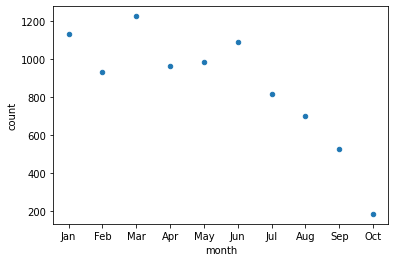

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df1 = total_completed_status_month_wise.toPandas()
df1.plot.scatter(x='month', y='count')

Out[34]: <AxesSubplot:>

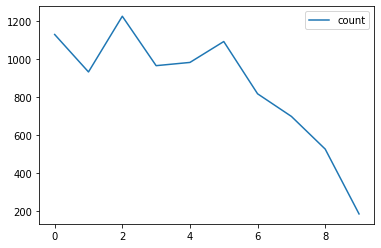

In [0]:

df1.plot.line()

In [0]:
display(dbutils.fs.head("/FileStore/tables/mesh.csv"))


[Truncated to first 65536 bytes]
'term,tree\r\nCalcimycin,D03.633.100.221.173\r\nA-23187,D03.633.100.221.173\r\nTemefos,D02.705.400.625.800\r\nTemefos,D02.705.539.345.800\r\nTemefos,D02.886.300.692.800\r\nAbate,D02.705.400.625.800\r\nAbate,D02.705.539.345.800\r\nAbate,D02.886.300.692.800\r\nDifos,D02.705.400.625.800\r\nDifos,D02.705.539.345.800\r\nDifos,D02.886.300.692.800\r\nAbattoirs,J01.576.423.200.700.100\r\nAbattoirs,J03.540.020\r\nAbbreviations as Topic,L01.559.598.400.556.131\r\nAcronyms as Topic,L01.559.598.400.556.131\r\nAbdomen,A01.923.047\r\n"Abdomen, Acute",C23.888.592.612.054.200\r\n"Abdomen, Acute",C23.888.821.030.249\r\nAbdominal Injuries,C26.017\r\nAbdominal Neoplasms,C04.588.033\r\nAbdominal Muscles,A02.633.567.050\r\nCremaster Muscle,A02.633.567.050\r\nPyramidalis Muscle,A02.633.567.050\r\nQuadratus Abdominis,A02.633.567.050\r\nTransversus Abdominis,A02.633.567.050\r\nAbducens Nerve,A08.800.800.120.030\r\nAbelson murine leukemia virus,B04.613.807.375.525.020\r\nAbelso

In [0]:
dbutils.fs.ls ("dbfs:/user/hive/warehouse/df2019_clin_table")


Out[37]: [FileInfo(path='dbfs:/user/hive/warehouse/df2019_clin_table/_delta_log/', name='_delta_log/', size=0),
 FileInfo(path='dbfs:/user/hive/warehouse/df2019_clin_table/part-00000-769d9cbf-b61a-4fb3-95c9-122b611401d6-c000.snappy.parquet', name='part-00000-769d9cbf-b61a-4fb3-95c9-122b611401d6-c000.snappy.parquet', size=1088131),
 FileInfo(path='dbfs:/user/hive/warehouse/df2019_clin_table/part-00001-15d3a971-2ed4-41e4-854b-1370ffbdab47-c000.snappy.parquet', name='part-00001-15d3a971-2ed4-41e4-854b-1370ffbdab47-c000.snappy.parquet', size=1088374),
 FileInfo(path='dbfs:/user/hive/warehouse/df2019_clin_table/part-00002-e84bda07-2107-4bd7-ae02-36f113faf7b7-c000.snappy.parquet', name='part-00002-e84bda07-2107-4bd7-ae02-36f113faf7b7-c000.snappy.parquet', size=1095364),
 FileInfo(path='dbfs:/user/hive/warehouse/df2019_clin_table/part-00003-1dfd4ac5-dad5-4729-a63d-1ced1e3e7773-c000.snappy.parquet', name='part-00003-1dfd4ac5-dad5-4729-a63d-1ced1e3e7773-c000.snappy.parquet', size=1087286),
 Fil

In [0]:
# creting hive tables from existing dataframes
# Hive table Location : dbfs:/user/hive/warehouse/df_2019
# Hive table Location : dbfs:/user/hive/warehouse/df_2020
# Hive table Location : dbfs:/user/hive/warehouse/df_2021
tableName_2019 = "df2019_clin_table1"
tableName_2020 = "df2020_clin_table1"
tableName_2021 = "df2021_clin_table1"
df_2019.write.saveAsTable(tableName_2019)
df_2020.write.saveAsTable(tableName_2020)
df_2021.write.saveAsTable(tableName_2021)










databricks fs rm /user/hive/warehouse/df2019_clin_table/*
#dbutils.fs.rm -r("dbfs:/user/hive/warehouse/df2019_clin_table")